In [833]:
import numpy as np
from scipy.signal.windows import hamming, boxcar
from scipy.signal import freqz
import matplotlib.pyplot as plt
from optic.comm.modulation import modulateGray, demodulateGray, grayMapping
from optic.dsp.core import firFilter, pulseShape, lowPassFIR, pnorm, upsample
from optic.plot import eyediagram
import pandas as pd

In [405]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

## Visualizando o Espectro do Pulso de Hamming

(-40.0, 20.0)

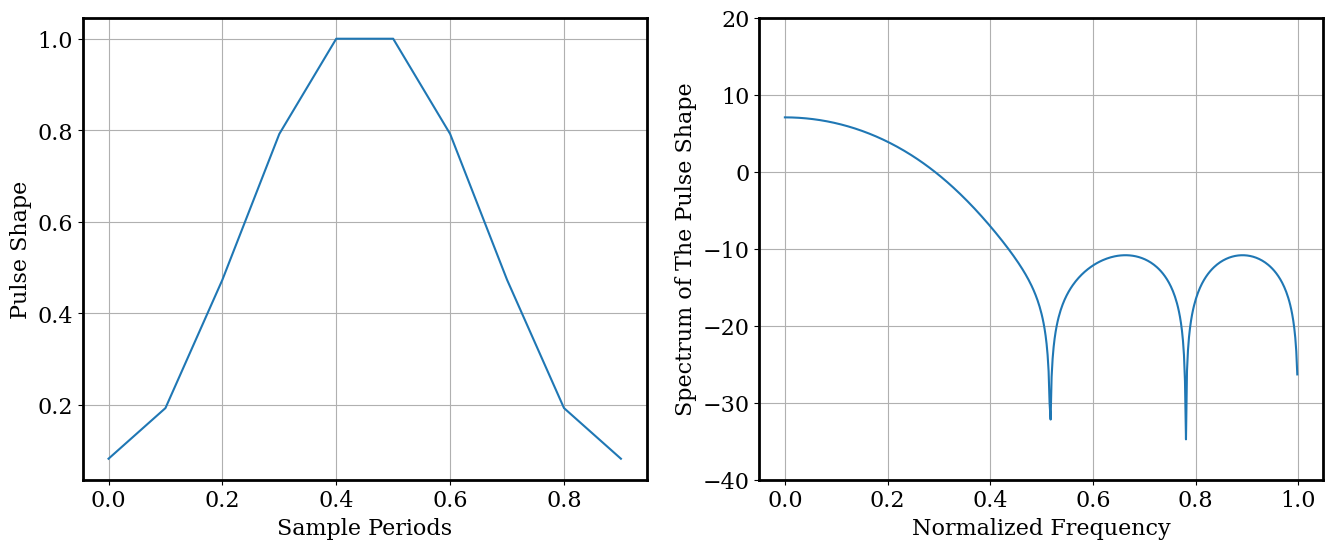

In [964]:
M = 4
N = 1000 ## length
T = 1 ## Período de Sinalização
SpS = 10 ## Amostras Por símbolo
Fa = 1/(T/SpS) ## Período de Amostragem do sinal
Ta = 1/Fa ## Frequência de Amostragem do sinal

pulse = hamming(SpS) ## coefficients of the hamming pulse
pulse = pulse/(np.max(pulse)) ## normalizing the pulse
w, HP = freqz(pulse) ## Impulse Response of the pulse shape filter
t = np.arange(SpS)*Ta

figure, ax = plt.subplots(1, 2, figsize = (16, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(t, pulse)
ax[0].grid(True)
ax[0].set_xlabel('Sample Periods')
ax[0].set_ylabel('Pulse Shape')
ax[1].plot(w/np.pi, 10*np.log10(abs(HP)))
ax[1].grid(True)
ax[1].set_xlabel('Normalized Frequency')
ax[1].set_ylabel('Spectrum of The Pulse Shape')
ax[1].set_ylim([-40, 20])

## T wide Pulse

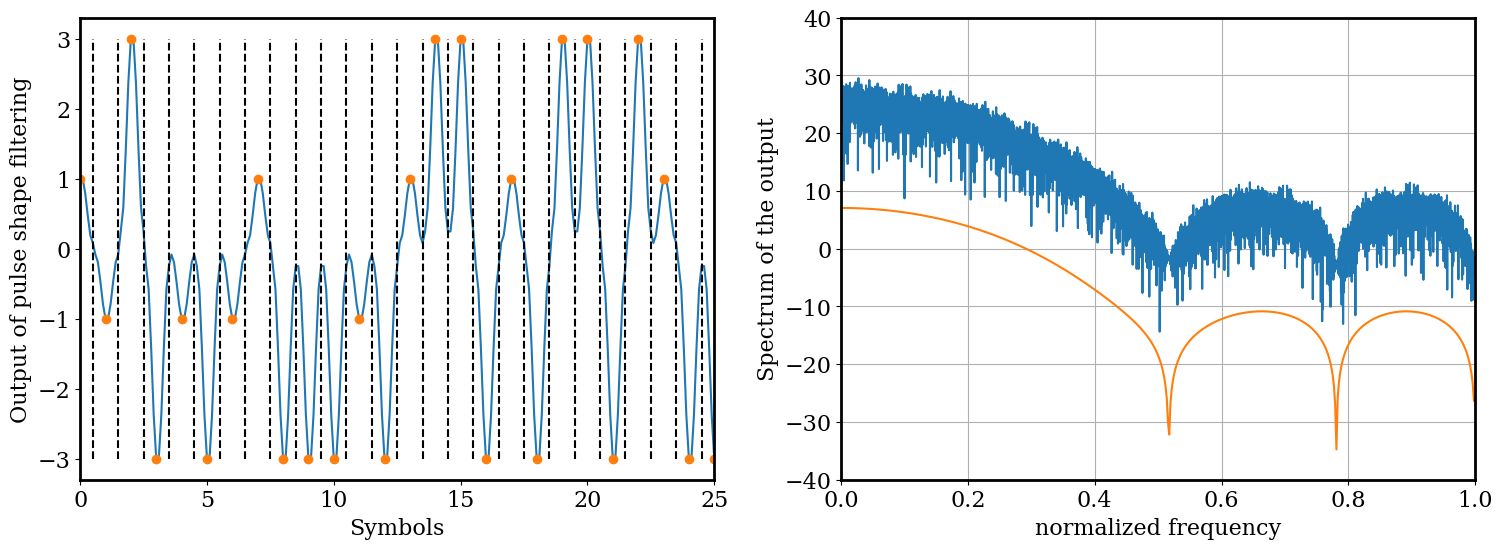

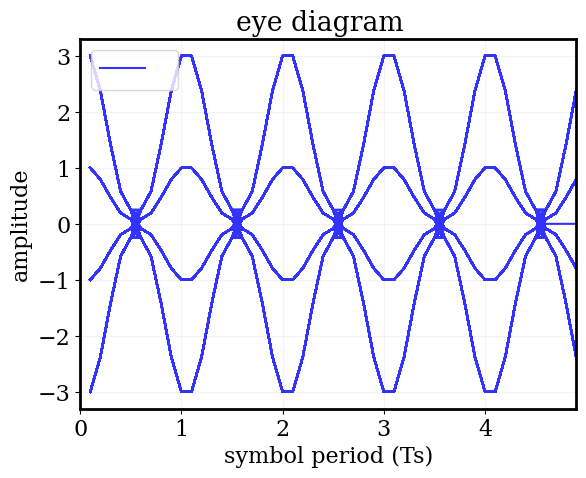

In [965]:
bitsTx = np.random.randint(2, size = int(N*np.log2(M)))
symbTx = modulateGray(bitsTx, M, 'pam')
symbolsUp = upsample(symbTx, SpS) ## Upsampling the Bits
sigTx = firFilter(pulse, symbolsUp) ## Pulse Shaping
t = np.arange(sigTx.size)*Ta
X = np.fft.fftshift(np.fft.fft(sigTx)) ## Spectrum of the Output
freqs = np.fft.fftshift(np.fft.fftfreq(X.size, d = Ta))

# instantes centrais dos intervalos de sinalização
symbolsUp[symbolsUp==0] = np.nan

## Ploting the Transmitted Signal
figure, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(t, sigTx)
ax[0].plot(t, symbolsUp, '-o')
## Plotting the isntants of Sinalization
t = (0.5*T + np.arange(0, symbTx.size*T, T))
ax[0].vlines(t, min(symbTx), max(symbTx), linestyles='dashed', color = 'k')
ax[0].set_xlim(0, 25);
ax[0].set_xlabel('Symbols')
ax[0].set_ylabel('Output of pulse shape filtering')
ax[1].plot(freqs/np.max(freqs), 10*np.log10(abs(X)));
ax[1].plot(w/np.pi, 10*np.log10(abs(HP)))
ax[1].set_xlim([0, 1])
ax[1].set_ylim([-40, 40])
ax[1].set_xlabel('normalized frequency')
ax[1].set_ylabel('Spectrum of the output')
ax[1].grid(True)
eyediagram(sigTx, N*SpS,SpS, n = 5)

## Double Wide Pulse

(-40.0, 20.0)

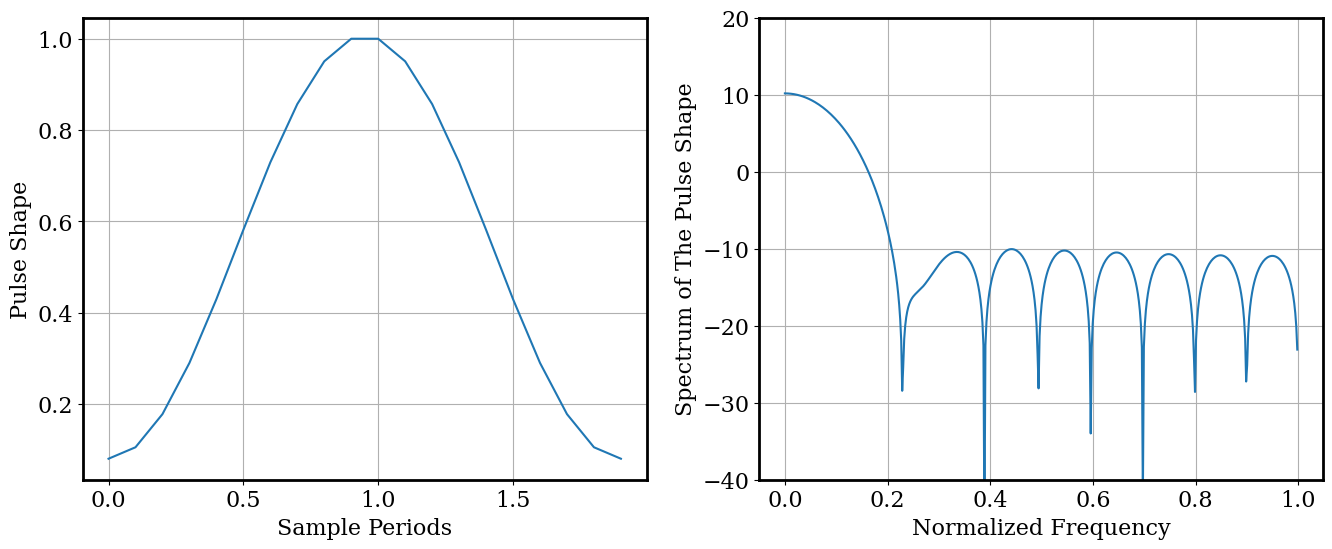

In [1291]:
M = 4
m = 2 ## double wide pulse
N = 1000 ## length
T = 1 ## Período de Sinalização
SpS = 10 ## Amostras Por símbolo
Fa = 1/(T/SpS) ## Período de Amostragem do sinal
Ta = 1/Fa ## Frequência de Amostragem do sinal

pulse = hamming(m*SpS) ## coefficients of the hamming pulse
pulse = pulse/(np.max(pulse)) ## normalizing the pulse
w, HP = freqz(pulse) ## Impulse Response of the pulse shape filter
t = np.arange(m*SpS)*Ta

figure, ax = plt.subplots(1, 2, figsize = (16, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(t, pulse)
ax[0].grid(True)
ax[0].set_xlabel('Sample Periods')
ax[0].set_ylabel('Pulse Shape')
ax[1].plot(w/np.pi, 10*np.log10(abs(HP)))
ax[1].grid(True)
ax[1].set_xlabel('Normalized Frequency')
ax[1].set_ylabel('Spectrum of The Pulse Shape')
ax[1].set_ylim([-40, 20])

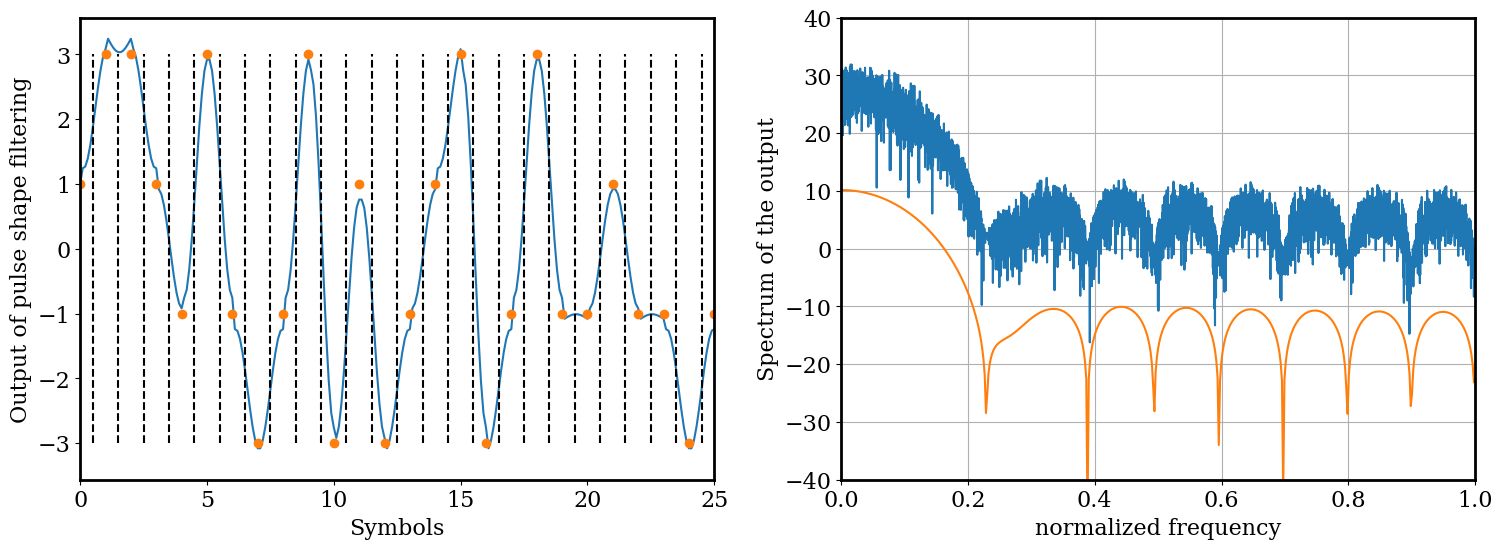

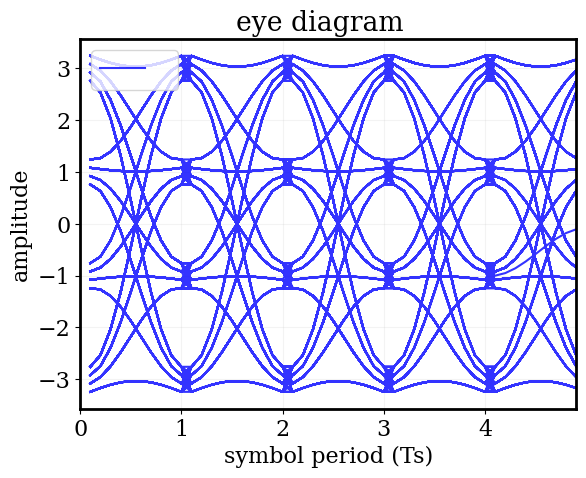

In [1292]:
bitsTx = np.random.randint(2, size = int(N*np.log2(M)))
symbTx = modulateGray(bitsTx, M, 'pam')
symbolsUp = upsample(symbTx, SpS) ## Upsampling the Bits
sigTx = firFilter(pulse, symbolsUp) ## Pulse Shaping
t = np.arange(sigTx.size)*Ta
X = np.fft.fftshift(np.fft.fft(sigTx)) ## Spectrum of the Output
freqs = np.fft.fftshift(np.fft.fftfreq(X.size, d = Ta))

# instantes centrais dos intervalos de sinalização
symbolsUp[symbolsUp==0] = np.nan

## Ploting the Transmitted Signal
figure, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(t, sigTx)
ax[0].plot(t, symbolsUp, '-o')
## Plotting the isntants of Sinalization
t = (0.5*T + np.arange(0, symbTx.size*T, T))
ax[0].vlines(t, min(symbTx), max(symbTx), linestyles='dashed', color = 'k')
ax[0].set_xlim(0, 25);
ax[0].set_xlabel('Symbols')
ax[0].set_ylabel('Output of pulse shape filtering')
ax[1].plot(freqs/np.max(freqs), 10*np.log10(abs(X)));
ax[1].plot(w/np.pi, 10*np.log10(abs(HP)))
ax[1].set_xlim([0, 1])
ax[1].set_ylim([-40, 40])
ax[1].set_xlabel('normalized frequency')
ax[1].set_ylabel('Spectrum of the output')
ax[1].grid(True)
eyediagram(sigTx, N*SpS,SpS, n = 5)

## 4T, 6T and 10T wide pulse

(-40.0, 20.0)

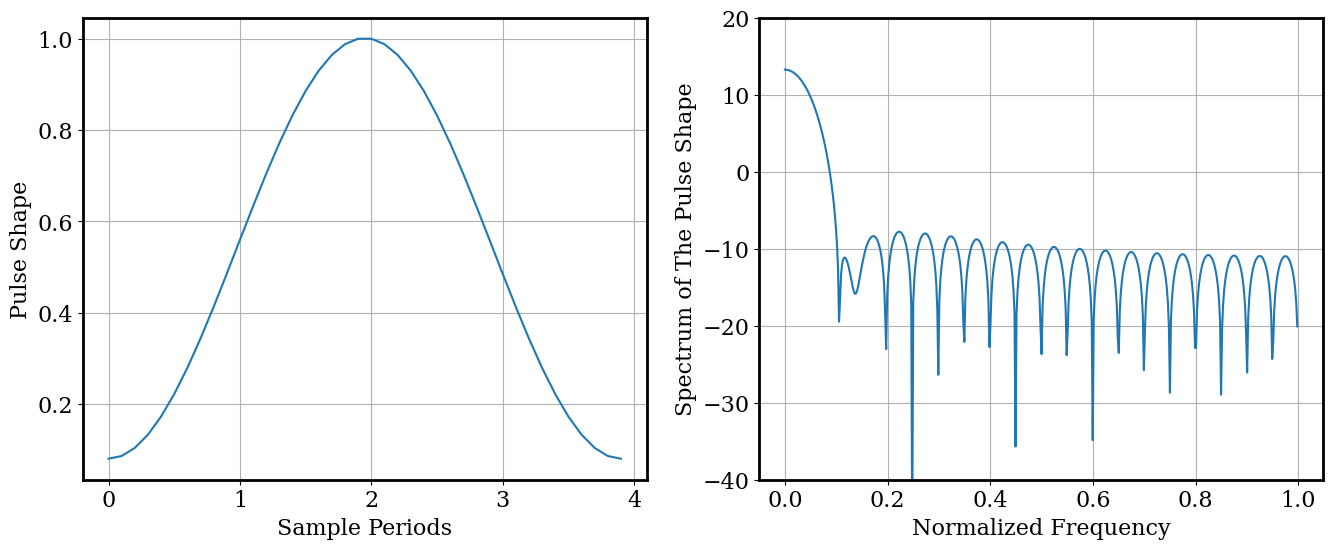

In [926]:
M = 4
m = [4, 6, 10]
m = m[0] 
N = 1000 ## length
T = 1 ## Período de Sinalização
SpS = 10 ## Amostras Por símbolo
Fa = 1/(T/SpS) ## Período de Amostragem do sinal
Ta = 1/Fa ## Frequência de Amostragem do sinal

pulse = hamming(m*SpS) ## coefficients of the hamming pulse
pulse = pulse/(np.max(pulse)) ## normalizing the pulse
w, HP = freqz(pulse) ## Impulse Response of the pulse shape filter
t = np.arange(m*SpS)*Ta

figure, ax = plt.subplots(1, 2, figsize = (16, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(t, pulse)
ax[0].grid(True)
ax[0].set_xlabel('Sample Periods')
ax[0].set_ylabel('Pulse Shape')
ax[1].plot(w/np.pi, 10*np.log10(abs(HP)))
ax[1].grid(True)
ax[1].set_xlabel('Normalized Frequency')
ax[1].set_ylabel('Spectrum of The Pulse Shape')
ax[1].set_ylim([-40, 20])

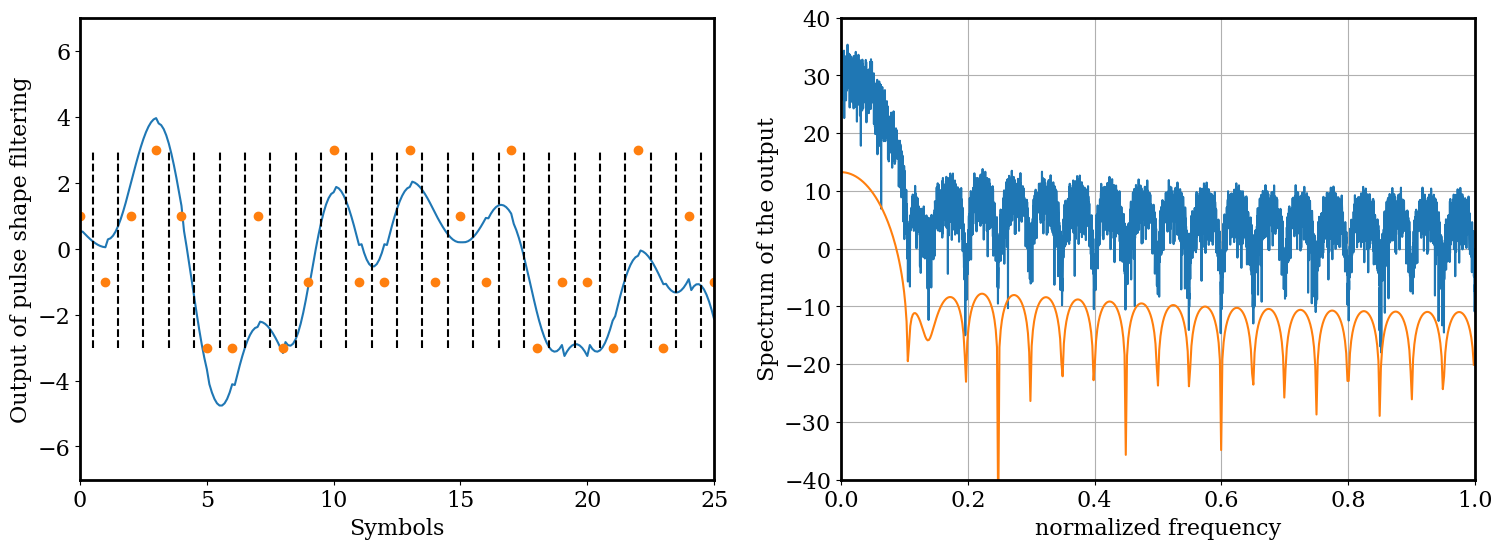

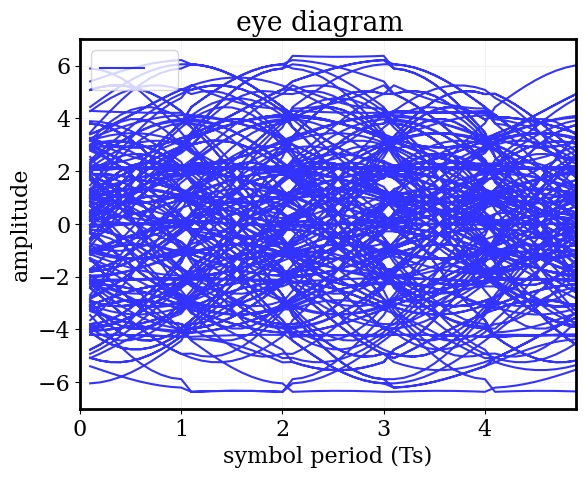

In [927]:
bitsTx = np.random.randint(2, size = int(N*np.log2(M)))
symbTx = modulateGray(bitsTx, M, 'pam')
symbolsUp = upsample(symbTx, SpS) ## Upsampling the Bits
sigTx = firFilter(pulse, symbolsUp) ## Pulse Shaping
t = np.arange(sigTx.size)*Ta
X = np.fft.fftshift(np.fft.fft(sigTx)) ## Spectrum of the Output
freqs = np.fft.fftshift(np.fft.fftfreq(X.size, d = Ta))

# instantes centrais dos intervalos de sinalização
symbolsUp[symbolsUp==0] = np.nan

## Ploting the Transmitted Signal
figure, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(t, sigTx)
ax[0].plot(t, symbolsUp, '-o')
## Plotting the isntants of Sinalization
t = (0.5*T + np.arange(0, symbTx.size*T, T))
ax[0].vlines(t, min(symbTx), max(symbTx), linestyles='dashed', color = 'k')
ax[0].set_xlim(0, 25);
ax[0].set_xlabel('Symbols')
ax[0].set_ylabel('Output of pulse shape filtering')
ax[1].plot(freqs/np.max(freqs), 10*np.log10(abs(X)));
ax[1].plot(w/np.pi, 10*np.log10(abs(HP)))
ax[1].set_xlim([0, 1])
ax[1].set_ylim([-40, 40])
ax[1].set_xlabel('normalized frequency')
ax[1].set_ylabel('Spectrum of the output')
ax[1].grid(True)
eyediagram(sigTx, N*SpS,SpS, n = 5)

## Pulso Cosseno Levantado

In [1212]:
def RC(t, fo, Beta):
    f_delta = fo*Beta
    return 2*fo*(np.sin(2*np.pi*fo*t)/(2*np.pi*fo*t))*np.cos(2*np.pi*f_delta*t)/(1-(4*f_delta*t)**2)

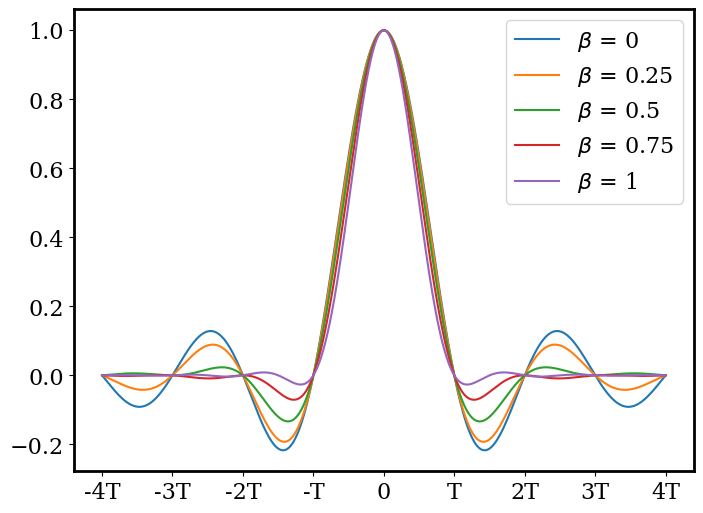

In [1213]:
T = 1
fo = 1/(2*T)
t_left = np.linspace(-4*T, 0.001*T, 1000)
t_right = np.linspace(0.001*T, 4*T, 1000)
t = np.concatenate([t_left, t_right])

beta = [0, 0.25, 0.5, 0.75, 1]
hrc = np.zeros((len(beta), len(t)))

figure = plt.figure(figsize=(8, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
for i in range(len(beta)):
    hrc[i:,] = RC(t, fo, beta[i])
    plt.plot(t, hrc[i,:], label = r'$\beta$' + ' = '+ str(beta[i]))
    plt.legend(loc = 'upper right')
    x = np.arange(-4, 5)*T
    labels = ['-4T','-3T', '-2T','-T','0','T','2T','3T','4T']
    plt.xticks(x, labels)

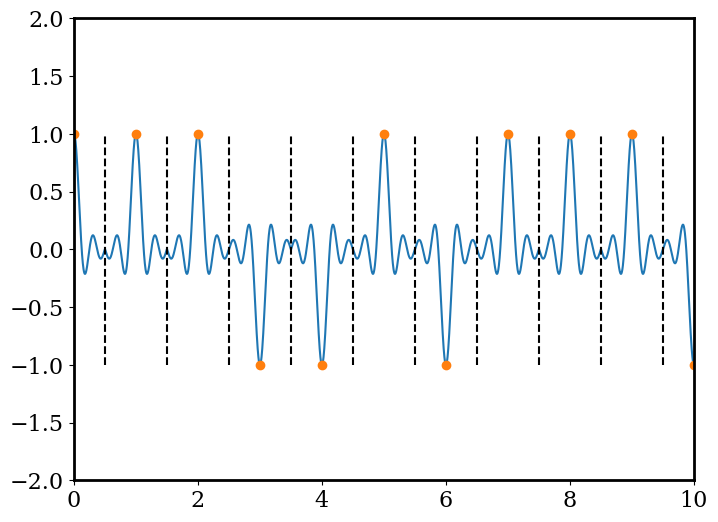

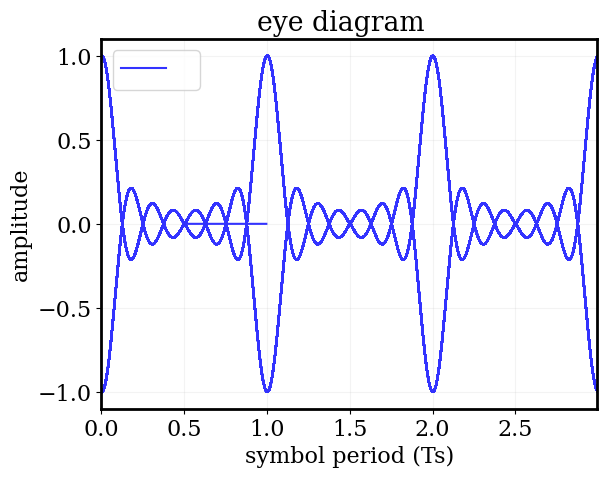

In [1293]:
M = 2
N = 1000 ## length
T = 1 ## Período de Sinalização
SpS = 256 ## Amostras Por símbolo
Fa = 1/(T/SpS) ## Período de Amostragem do sinal
Ta = 1/Fa ## Frequência de Amostragem do sinal
#t = np.arange(SpS)*Ta

bitsTx = np.random.randint(2, size = int(N*np.log2(M)))
symbTx = modulateGray(bitsTx, M, 'pam')
symbolsUp = upsample(symbTx, SpS) ## Upsampling the Bits

beta = 0.1 ## roll-pff parameter
L = 4
fo = 1/(2*T)
pulse = RC(np.linspace(-L*T, L*T, SpS), fo, beta)
pulse = pulse/(np.max(pulse))

sigTx = firFilter(pulse, symbolsUp) ## Pulse Shaping
symbolsUp[symbolsUp==0] = np.nan

t = np.arange(sigTx.size)*Ta

figure = plt.figure(figsize=(8, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(t, sigTx.real)
plt.plot(t, symbolsUp.real, '-o')
plt.xlim(0, 10);
plt.ylim([-2, 2])
t = (0.5*T + np.arange(0, symbTx.size*T, T))
plt.vlines(t, min(symbTx), max(symbTx), linestyles='dashed', color = 'k')
eyediagram(sigTx, N*SpS,SpS, n = 3)